\newpage

In [2]:
# we start import our dataset from the project discription
from ucimlrepo import fetch_ucirepo 

# we set up the variables for the upcoming questions  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
ckd = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets
  
# metadata
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [21]:
# we put most of the import codes here for the simplicity of the code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Question 1

Based on the above dataset, our classification problem is to predict whether an individual has chronic kidney disease (CKD) by comparing 24 features such as age, blood pressure, glucose, and red blood cells. The prediction result of the model can help doctors to make early intervention.

### Question 2

In [4]:
# display the data type in the ckd dataset
ckd.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [5]:
# select the columns by data type(float64 and object), and print first 10 observations
float_columns = ckd.select_dtypes(include=['float64']).columns
object_columns = ckd.select_dtypes(include=['object']).columns

print(ckd[object_columns].head(10))

        rbc        pc         pcc          ba  htn   dm cad appet   pe  ane
0       NaN    normal  notpresent  notpresent  yes  yes  no  good   no   no
1       NaN    normal  notpresent  notpresent   no   no  no  good   no   no
2    normal    normal  notpresent  notpresent   no  yes  no  poor   no  yes
3    normal  abnormal     present  notpresent  yes   no  no  poor  yes  yes
4    normal    normal  notpresent  notpresent   no   no  no  good   no   no
5       NaN       NaN  notpresent  notpresent  yes  yes  no  good  yes   no
6       NaN    normal  notpresent  notpresent   no   no  no  good   no   no
7    normal  abnormal  notpresent  notpresent   no  yes  no  good  yes   no
8    normal  abnormal     present  notpresent  yes  yes  no  good   no  yes
9  abnormal  abnormal     present  notpresent  yes  yes  no  poor   no  yes


In [6]:
#mapping the object columns to the numercial values
transfer = {
    'rbc': {'abnormal':0, 'normal':1},
    'pc': {'abnormal':0, 'normal':1},
    'pcc': {'notpresent':0, 'present':1},
    'ba': {'notpresent':0, 'present':1},
    'htn': {'no':0, 'yes':1},
    'dm': {'no':0, 'yes':1},
    'cad': {'no':0, 'yes':1},
    'appet': {'poor':0, 'good':1},
    'pe': {'no':0, 'yes':1},
    'ane': {'no':0, 'yes':1},
}

In [7]:
# apply the mappings defined in the previous code.
ckd_transformed = pd.DataFrame(ckd)

for column, mapping in transfer.items():
    if column in ckd_transformed.columns:
        ckd_transformed[column] = ckd_transformed[column].map(mapping)

In [8]:
# print the summary of the dataset after mapping.
ckd_transformed.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,348.000000,329.000000,294.000000,269.000000,398.000000,397.000000,398.000000,399.000000,399.000000,399.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.810484,0.773134,0.106061,0.055556,148.036517,...,12.526437,38.884498,8406.122449,4.707435,0.369347,0.345088,0.085427,0.794486,0.190476,0.150376
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,2.912587,8.990105,2944.474190,1.025323,0.483235,0.475997,0.279868,0.404584,0.393170,0.357888
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,...,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,163.000000,...,15.000000,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# normalize the float columns, scale the float type column using standardScaler
scaler = StandardScaler()
ckd_transformed[float_columns] = scaler.fit_transform(ckd_transformed[float_columns])

In [10]:
#print the summary of our dataset after mapping and normalization.
ckd_transformed[float_columns].describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00


### Question 3

In [11]:
#let's show the detatypes of transformed dataset 
ckd_transformed.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
dtype: object

In [12]:
# show the summary of transformed dataset
ckd_transformed.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,3.560000e+02,...,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02,398.000000,397.000000,398.000000,399.000000,399.000000,399.000000
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,0.810484,0.773134,0.106061,0.055556,-1.796316e-16,...,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16,0.369347,0.345088,0.085427,0.794486,0.190476,0.150376
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,0.392711,0.419431,0.308305,0.229351,1.001407e+00,...,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00,0.483235,0.475997,0.279868,0.404584,0.393170,0.357888
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,0.000000,0.000000,0.000000,0.000000,-1.591967e+00,...,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-6.193803e-01,...,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-3.414983e-01,...,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.000000,1.000000,0.000000,0.000000,1.890038e-01,...,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,1.000000,1.000000,1.000000,1.000000,4.319341e+00,...,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the dataset, we can see that numerical variables such as "age", "blood pressure" and "specific gravity" have been standardized. Categorical variables such as "erythrocytes", "pus cells", and "hypertension" have been coded as binary values.

The dataset has 400 observations. The number of non-null values varies from variable to variable, indicating that there is missing data in multiple columns, which needs to be addressed in subsequent data processing steps.

Standardized numerical variables now have a mean close to 0 and a standard deviation of 1. This standardization helps keep the model inputs consistent.

### Question 4

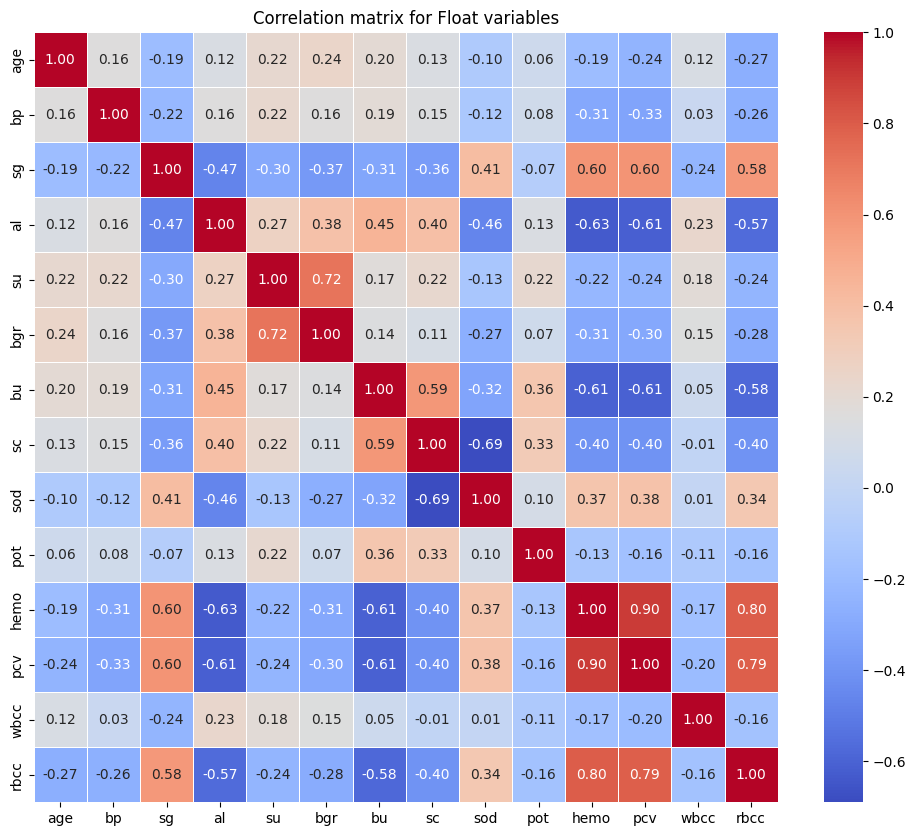

In [13]:
# calculate and show the heatmap of the correlation matrix
correlation_matrix = ckd_transformed[float_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation matrix for Float variables')
plt.show()

from the plot, we can see that 'hemo'(homoglobin) and 'pcv'(packed cells volumn) show a very strong positive correlation, which means they might have redunant informations.

The variable 'pot'(potassium) has relatively low correlations with all other variables. This may suggest that this variable will plays an important role in prediction. 

from the plot, we can see that 'sod'(sodium) and 'sc'(serum creatinine) have a strong negative correlation, which is -0.69. This means if sod increase will cause a decrease in sc.

### Question 5

In [14]:
#let's find all the missing values
missing_value = ckd_transformed.isnull().sum()
missing_value

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [15]:
#next, let's handling all the missing values
ckd_mean = ckd_transformed.mean()
ckd_filled = ckd_transformed.fillna(ckd_mean)

ckd_filled.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,0.810484,1.0,0.0,0.0,-3.414983e-01,...,0.988022,0.569881,-0.206202,4.812952e-01,1.0,1.0,0.0,1.0,0.0,0.0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,0.810484,1.0,0.0,0.0,-1.796316e-16,...,-0.421688,-0.098536,-0.818559,8.452553e-16,0.0,0.0,0.0,1.0,0.0,0.0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1.000000,1.0,0.0,0.0,3.473064e+00,...,-1.006202,-0.878356,-0.308261,8.452553e-16,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.000000,0.0,1.0,0.0,-3.920223e-01,...,-0.456071,-0.766953,-0.580420,-7.889609e-01,1.0,0.0,0.0,0.0,1.0,1.0
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.000000,1.0,0.0,0.0,-5.309633e-01,...,-0.318538,-0.432744,-0.376301,-1.049768e-01,0.0,0.0,0.0,1.0,0.0,0.0


### Question 6

1. There are some outliers on the Blood Pressure hiigher end. Given that high blood pressure is a significant clinical indicator, those outliers can be examined further, not removed.
2. Some outliers in Serum Creatinine and Blood Urea Nitrogen may relevant to the study on chronic kidney disease. So, it is better to keep those outliers.

In the context of medical data, the outliers may represent the special cases for diagnosis. Therefore, we should keep them in the dataset instead of remove them.

### Question 7

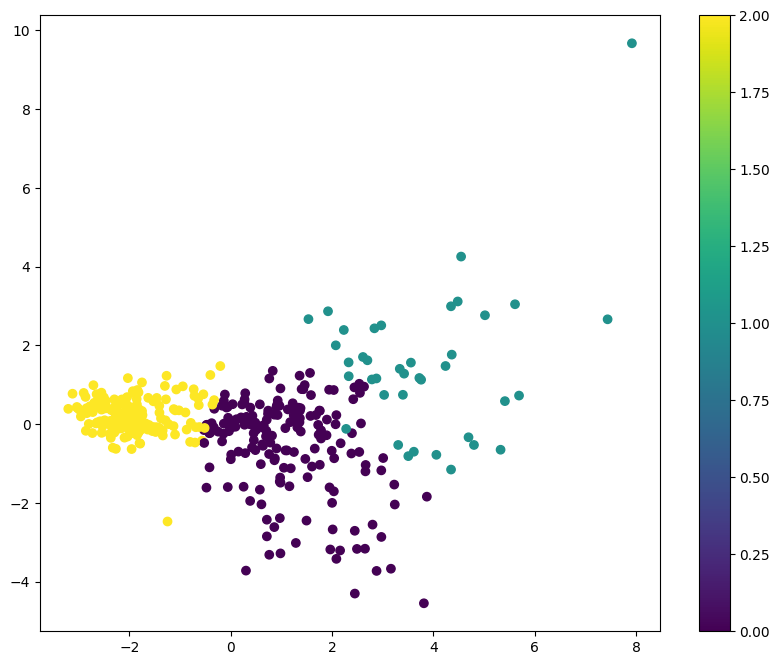

In [16]:
# let's use PCA and K-means clustering and show the figure.
ckd_cluster = pd.concat([ckd_filled], axis=1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(ckd_cluster)

kmeans = KMeans(n_clusters=3, random_state=17)
cluster_labels = kmeans.fit_predict(ckd_cluster)

plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.colorbar()
plt.show()

### Question 8

In [17]:
#split the data for model training
X_train, X_test, y_train, y_test = train_test_split(
    ckd_filled,
    y,
    test_size=0.3,
    random_state=1
)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((280, 24), (120, 24), (280, 1), (120, 1))

### Question 9

1. We can choose Random Forest Classifier.
Random forests don't suffer too much from outliers and it can handle unbalanced datasets. This is useful for the healthcare industry, especially for collecting special case scenarios.

2. We also can use Logistic Regression in our model.
Our model is a classical binary classification model, and logistic regression is very effective for dealing with binary classification models. It can provide insight into the role of different features in preventing CKD.

### Question 10

1. Accuracy:

Accuracy measures the proportion of total correct predictions amony the total number of cases examined.It enables us to evaluate the effectiveness of various classifiers in the simplest way possible. But it may not be very informative on its own when the data is unbalanced. It may be more misleading when the model needs to predict majority class.

2. Area Under the ROC Curve(AUC-ROC)

This metric assesses the ability of the classifier to distinguish between classes. When AUC is higher, it indicates the better ability to distinguish between CKD and not CKD. Compare with Accuracy metric, when the classes are imbalance, ROC will more useful than Accuracy because it considers both the true postive rate and the false positive rate.

### Question 11

In [18]:
# let's train the random forest classifier and show the importance of each feature
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

fi = rf.feature_importances_
ckd_fi = pd.DataFrame({'Feature': X_train.columns, 'Importance': fi})
sorted_ckd_fi = ckd_fi.sort_values(by='Importance', ascending=False)

sorted_ckd_fi

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
15,pcv,0.183065
14,hemo,0.149958
2,sg,0.135327
11,sc,0.092571
3,al,0.077848
5,rbc,0.075599
17,rbcc,0.068890
18,htn,0.038598
19,dm,0.034299
12,sod,0.026322


### Question 12

In [19]:
# We build the model with only the important features and evaluates them on accuracy and metrics
top_features = sorted_ckd_fi[sorted_ckd_fi['Importance'] > 0.05]['Feature']
rf_top_features = RandomForestClassifier(random_state=1)
rf_top_features.fit(X_train[top_features], y_train)

logreg = LogisticRegression(max_iter=1000, random_state=1)
logreg.fit(X_train[top_features], y_train)

y_pred_rf = rf_top_features.predict(X_test[top_features])
y_pred_logreg = logreg.predict(X_test[top_features])

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
auc_roc_rf = roc_auc_score(y_test, rf_top_features.predict_proba(X_test[top_features])[:, 1])
auc_roc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test[top_features])[:, 1])

(accuracy_rf, accuracy_logreg, auc_roc_rf, auc_roc_logreg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9916666666666667, 0.9833333333333333, 0.37142857142857144, 0.09)

1. We can see from the result, The accuracy has significantly higher ratio in both Random Forest and Logistic Regression than AUC-ROC. accuracy have 99.16% in Random Forest and 98.33% in Logistic Regression. But AUC-ROC only have 37.14% in Random Forest and 9% in Logistic Regression.

2. From the result, we also can make the decision that Random Froest is more suitable in our model than Logistic Regression. Both Accuracy and AUC-ROC have higher ratio in Random Froest. Random Forest is highly accurate and robust against overfitting.

### Question 13

In [20]:
# we train a logistic regression model on the whole dataset using the selected features.
# and calculate the coefficents
rf_full = LogisticRegression(max_iter=1000, random_state=1)
rf_full.fit(ckd_filled[top_features],y)

coef = rf_full.coef_[0]
ckd_coef = pd.DataFrame({'Feature': top_features, 'Coefficient': coef})

sorted_ckd_coef = ckd_coef.sort_values(by='Coefficient', key=abs, ascending=False)
sorted_ckd_coef

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature,Coefficient
5,rbc,-1.332504
3,al,0.876320
2,sg,-0.861387
14,hemo,-0.819001
11,sc,0.791152
15,pcv,-0.712005
17,rbcc,0.155859


1. rbc have the most significant negative coefficient (-1.33). Represent that this feature has the highest impact on predicting CKD.
2. al have a significant positive coefficient (0.87), also have a lagre impact on predicting CKD.

### Question 14

### Team contribution


Question 1:Xianmiao Zhao


Question 2:Haochen Wei


Question 3:Xianmiao Zhao


Question 4:Haochen Wei


Question 5:Xianmiao Zhao


Question 6:Haochen Wei


Question 7:Xianmiao Zhao


Question 8:Haochen Wei


Question 9:Xianmiao Zhao


Question 10:Haochen Wei


Question 11:Haochen Wei, Xianmiao Zhao


Question 12:Haochen Wei, Xianmiao Zhao


Question 13:Haochen Wei, Xianmiao Zhao

### link to public GitHub repository
https://github.com/ShoterMK2/Assignment_6.git
